In [ ]:
# 11. Make sure you have completed this example from lecture: Load data file cars.csv from Moodle
# a) Install Pandas profiler (see script example) and Great Expectations (you can also try Openrefine)
# b) Examine using Pandas profiler and Great Expectations. You can also test OpenRefine
# c) Do you find quality issues?
# d) Can they be fixed?

# ============================================================
# Exercise 11 – Data Quality Check with cars.csv
# ============================================================

# (Run once if needed)
# pip install ydata-profiling
# pip install great_expectations
# pip install -U ipywidgets

import pandas as pd
from ydata_profiling import ProfileReport
import great_expectations as gx

# ------------------------------------------------------------
# Load data
# ------------------------------------------------------------
df = pd.read_csv("../Data/cars.csv")

# ------------------------------------------------------------
# a) Pandas Profiling
# ------------------------------------------------------------
profile = ProfileReport(
    df,
    title="Cars Dataset - Profiling Report",
    explorative=True
)

profile.to_file("cars_profile.html")
print("✅ Pandas profiling report saved: cars_profile.html")

# ------------------------------------------------------------
# b) Great Expectations setup
# ------------------------------------------------------------
context = gx.get_context()

data_source = context.data_sources.add_pandas(name="cars_source")
data_asset = data_source.add_dataframe_asset(name="cars_asset")

batch_definition = data_asset.add_batch_definition_whole_dataframe(
    name="cars_batch"
)

batch = batch_definition.get_batch(
    batch_parameters={"dataframe": df}
)

# ------------------------------------------------------------
# Create expectation suite
# ------------------------------------------------------------
suite = gx.ExpectationSuite(name="cars_suite")

# Transmission values should be valid
suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(
        column="Transmission",
        value_set=["1", "2", "3", "4", "5", "7"]
    )
)

# Index column should be unique
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeUnique(column="index")
)

context.suites.add(suite)

# ------------------------------------------------------------
# Validate data
# ------------------------------------------------------------
validation_results = batch.validate(suite)

# Add run_id required for HTML rendering
validation_results["meta"]["run_id"] = "manual_run"

# ------------------------------------------------------------
# Export validation report
# ------------------------------------------------------------
from great_expectations.render.renderer import ValidationResultsPageRenderer
from great_expectations.render.view import DefaultJinjaPageView

renderer = ValidationResultsPageRenderer()
rendered = renderer.render(validation_results)
html = DefaultJinjaPageView().render(rendered)

with open("cars_validation_report.html", "w", encoding="utf-8") as f:
    f.write(html)

print("✅ Great Expectations report saved: cars_validation_report.html")

# ------------------------------------------------------------
# c) Data quality issues found
# ------------------------------------------------------------
# - Unexpected values in the Transmission column
# - Missing values in EngineVolume and Cylinders columns

# ------------------------------------------------------------
# d) Can they be fixed?
# ------------------------------------------------------------
# - Invalid categorical values can be corrected or removed
# - Missing values can be imputed or rows removed


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\ydata_profiling\model\describe.py:85: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_start = datetime.utcnow()
100%|██████████| 8/8 [00:00<00:00, 24.46it/s]
c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\ydata_profiling\model\describe.py:190: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_end = datetime.utcnow()


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, c

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Pandas profiling report saved: cars_profile.html


Calculating Metrics:   0%|          | 0/11 [00:00<?, ?it/s]

✅ Great Expectations report saved: cars_validation_report.html


In [ ]:
# 12. The data file titanic.csv contains a fraction of the Titanic passenger list, but some values are erroneous.

# a) What could be the validation criteria for each column? In other words, how the data in each column should be. Note that all the columns don't have very strong validation criteria and sometimes you have to investigate the data before defining the criteria.
# b) Investigate the data quality using Python Pandas Profiler, Openrefine and/or Great Expectations
# c) Describe the possible errors you found in each column and how you could fix them (if possible, no need to fix them)

import pandas as pd
import great_expectations as gx
from ydata_profiling import ProfileReport
from great_expectations.render.renderer import ValidationResultsPageRenderer
from great_expectations.render.view import DefaultJinjaPageView


df = pd.read_csv("../Data/titanic.csv")
print(df.info())
print(df.describe(include="all"))

# =====================================================
# a) Validation Criteria for Each Column
# =====================================================
# Column                 | Validation Criteria
# ---------------------- | ------------------
# Survived               | Must be 0 or 1 (binary)
# Pclass                 | Must be 1, 2, or 3 (categorical)
# Name                   | Should be string; ideally unique, non-null
# Sex                    | Must be 'male' or 'female' (categorical)
# Age                    | Must be numeric, positive, reasonable 0-120
# Siblings/Spouses Aboard| Must be numeric, non-negative (0-20)
# Parents/Children Aboard| Must be numeric, non-negative (0-20)
# Fare                   | Must be numeric, non-negative, reasonable max (~5000)

# =====================================================
# b) Data Quality Investigation – Pandas Profiling
# =====================================================
profile = ProfileReport(
    df,
    title="Titanic Data Quality Report",
    minimal=True,          # Prevents crashes
    explorative=False
)
profile.to_file("titanic_profile.html")

# =====================================================
# Data Quality Investigation – Great Expectations
# =====================================================
# Create Great Expectations context
context = gx.get_context()

# Add pandas datasource and dataframe asset
datasource = context.data_sources.add_pandas(name="titanic_ds")
asset = datasource.add_dataframe_asset(name="titanic_asset")
batch_def = asset.add_batch_definition_whole_dataframe("batch")
batch = batch_def.get_batch(batch_parameters={"dataframe": df})

# Create expectation suite
suite = gx.ExpectationSuite(name="titanic_suite")

# -------------------------
# Column Validations
# -------------------------
suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(column="Survived", value_set=[0, 1])
)
suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(column="Pclass", value_set=[1, 2, 3])
)
suite.add_expectation(
    gx.expectations.ExpectColumnDistinctValuesToBeInSet(column="Sex", value_set=["male", "female"])
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Age", min_value=0, max_value=120)
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Siblings/Spouses Aboard", min_value=0, max_value=20)
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Parents/Children Aboard", min_value=0, max_value=20)
)
suite.add_expectation(
    gx.expectations.ExpectColumnValuesToBeBetween(column="Fare", min_value=0, max_value=5000)
)

# Add suite to context
context.suites.add(suite)

# -------------------------
# Validate the batch
# -------------------------
results = batch.validate(suite)

# Fix for KeyError: 'run_id' in report
results.meta["run_id"] = "manual_run_001"

# Save validation report
renderer = ValidationResultsPageRenderer().render(results)
html = DefaultJinjaPageView().render(renderer)

with open("titanic_validation_report.html", "w", encoding="utf-8") as f:
    f.write(html)

print("Reports generated:")
print("- titanic_profile.html")
print("- titanic_validation_report.html")

# =====================================================
# c) Possible Errors Found and Notes for Fixing
# =====================================================
# Survived:
#   - Possible errors: missing values, values not 0/1.
#   - Fix: Fill missing with mode or remove rows with invalid values.

# Pclass:
#   - Possible errors: values outside 1-3 or missing.
#   - Fix: Correct or remove invalid entries.

# Name:
#   - Possible errors: missing names, duplicates.
#   - Fix: Ensure non-null; duplicates may be tolerated if names really repeat.

# Sex:
#   - Possible errors: missing or incorrect spelling (e.g., 'Male', 'F', 'female ').
#   - Fix: Standardize strings and fill missing values if necessary.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 888 non-null    float64
 1   Pclass                   886 non-null    float64
 2   Name                     888 non-null    object 
 3   Sex                      886 non-null    object 
 4   Age                      886 non-null    float64
 5   Siblings/Spouses Aboard  889 non-null    int64  
 6   Parents/Children Aboard  884 non-null    float64
 7   Fare                     885 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 55.7+ KB
None
          Survived      Pclass              Name   Sex         Age  \
count   888.000000  886.000000               888   886  886.000000   
unique         NaN         NaN               886    10         NaN   
top            NaN         NaN  Miss. Emily Rugg  male         NaN   
freq    

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\ydata_profiling\model\describe.py:85: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_start = datetime.utcnow()
100%|██████████| 8/8 [00:00<00:00, 1113.77it/s]
c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\ydata_profiling\model\describe.py:190: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date_end = datetime.utcnow()


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)
c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, c

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating Metrics:   0%|          | 0/34 [00:00<?, ?it/s]

An unexpected Exception occurred during data docs rendering.  Because of this error, certain parts of data docs will not be rendered properly and/or may not appear altogether.  Please use the trace, included in this message, to diagnose and repair the underlying issue.  Detailed information follows:
            TypeError: "num_to_str received an invalid value: 0.0 of type float64.".  Traceback: "Traceback (most recent call last):
  File "c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises\.venv\Lib\site-packages\great_expectations\render\util.py", line 64, in num_to_str
    d = local_context.create_decimal(s)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
decimal.InvalidOperation: [<class 'decimal.ConversionSyntax'>]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\edanv\Desktop\Plan_estudio_2025\Data_Analyst_ja_PM_2025\Materias\Data_Engineering\Data-Eng-Exercises

Reports generated:
- titanic_profile.html
- titanic_validation_report.html


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23975 entries, 0 to 23974
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         23975 non-null  datetime64[ns]
 1   Temperature  23217 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 374.7 KB
None

Missing values per column:
Time             0
Temperature    758
dtype: int64

Fraction of missing Temperature values: 3.16%


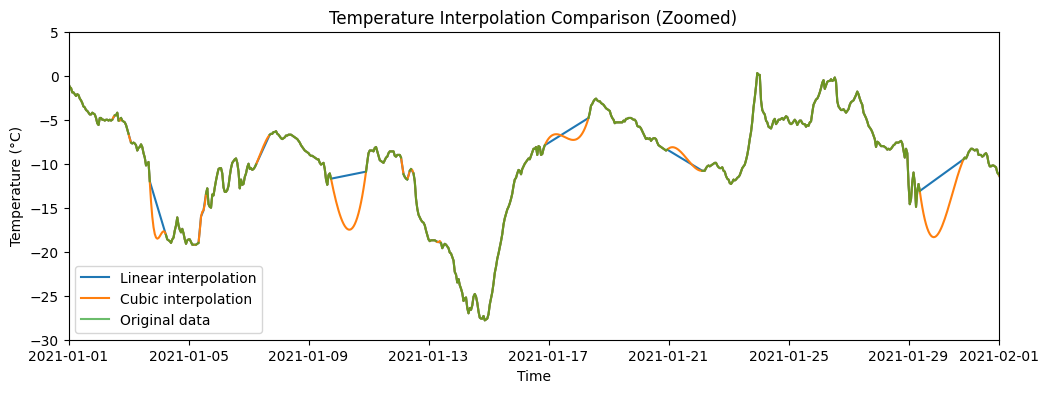

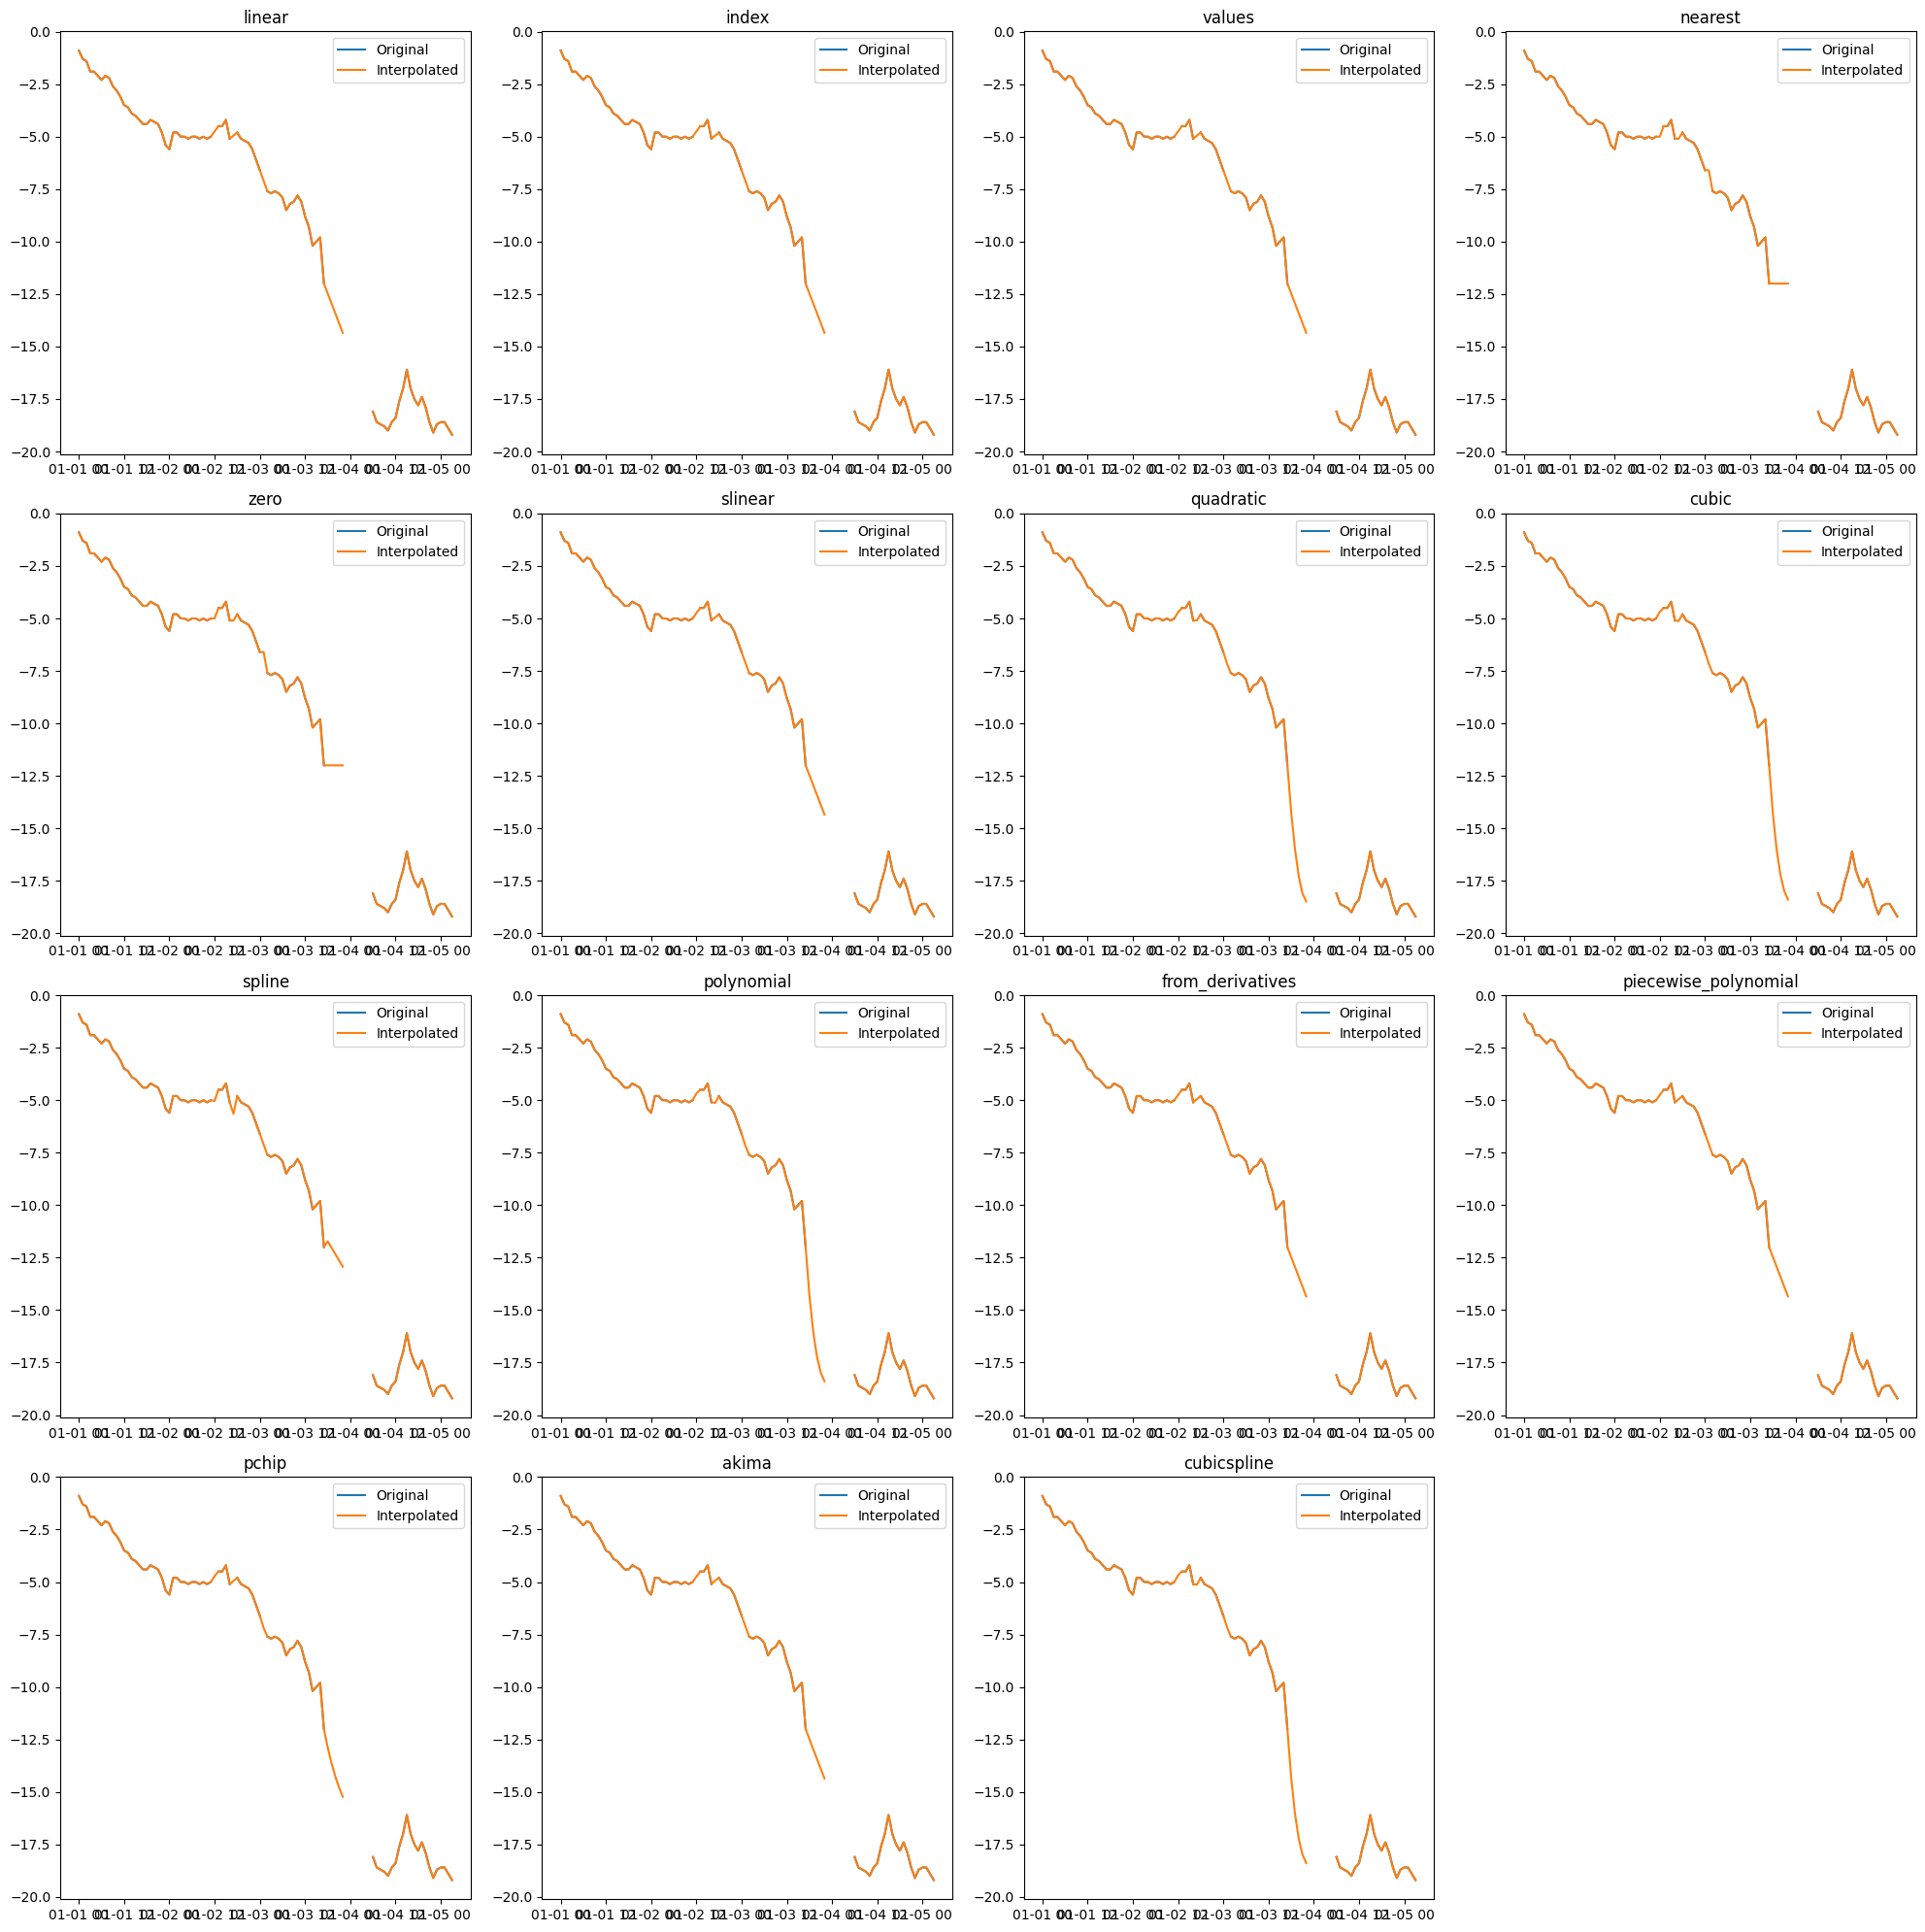


Original data (with gaps): Mean=-8.62, Max=-0.90, Min=-19.20

linear               | Mean=-8.78, Max=-0.90, Min=-19.20
index                | Mean=-8.78, Max=-0.90, Min=-19.20
values               | Mean=-8.78, Max=-0.90, Min=-19.20
nearest              | Mean=-8.70, Max=-0.90, Min=-19.20
zero                 | Mean=-8.70, Max=-0.90, Min=-19.20
slinear              | Mean=-8.78, Max=-0.90, Min=-19.20
quadratic            | Mean=-8.96, Max=-0.90, Min=-19.20
cubic                | Mean=-8.96, Max=-0.90, Min=-19.20
spline               | Mean=-8.73, Max=-0.90, Min=-19.20
polynomial           | Mean=-8.96, Max=-0.90, Min=-19.20
from_derivatives     | Mean=-8.78, Max=-0.90, Min=-19.20
piecewise_polynomial | Mean=-8.78, Max=-0.90, Min=-19.20
pchip                | Mean=-8.82, Max=-0.90, Min=-19.20
akima                | Mean=-8.78, Max=-0.90, Min=-19.20
cubicspline          | Mean=-8.96, Max=-0.90, Min=-19.20


In [ ]:
# 13. Tempereture observations have some gaps.
# a) Investigate the fraction of missing data
# b) Fill the gaps using different interpolation methods
# c) Investigate how different methods perform statistically and compare results visually
# Tip: Pandas interpolate, methods: ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']
# Example: df3['column'].interpolate(method='cubicspline', limit=10)


import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline


# Load data
df_temp = pd.read_csv('../Data/Temperature_data_with_gaps.csv')
df_temp['Time'] = pd.to_datetime(df_temp['Time'])

# a) Investigate the fraction of missing data

print("Data info:")
print(df_temp.info())

print("\nMissing values per column:")
print(df_temp.isnull().sum())

missing_fraction = df_temp['Temperature'].isnull().mean()
print(f"\nFraction of missing Temperature values: {missing_fraction:.2%}")

# b) Fill the gaps – simple visual comparison

plt.figure(figsize=(12, 4))

plt.plot(
    df_temp['Time'],
    df_temp['Temperature'].interpolate(method='linear'),
    label='Linear interpolation'
)

plt.plot(
    df_temp['Time'],
    df_temp['Temperature'].interpolate(method='cubic'),
    label='Cubic interpolation'
)

plt.plot(
    df_temp['Time'],
    df_temp['Temperature'],
    label='Original data',
    alpha=0.7
)

plt.axis([
    datetime.date(2021, 1, 1),
    datetime.date(2021, 2, 1),
    -30,
    5
])

plt.legend()
plt.title("Temperature Interpolation Comparison (Zoomed)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()

# b) Fill the gaps – multiple interpolation methods

methods = [
    'linear', 'index', 'values', 'nearest', 'zero', 'slinear',
    'quadratic', 'cubic', 'spline', 'polynomial',
    'from_derivatives', 'piecewise_polynomial',
    'pchip', 'akima', 'cubicspline'
]

# Limit data for clarity
df_lim = df_temp.iloc[:100]

plt.figure(figsize=(20, 20))

for i, method in enumerate(methods, 1):
    plt.subplot(4, 4, i)
    plt.title(method)

    if method in ['spline', 'polynomial']:
        interpolated = df_lim['Temperature'].interpolate(
            method=method, order=3, limit=5
        )
    else:
        interpolated = df_lim['Temperature'].interpolate(
            method=method, limit=5
        )

    plt.plot(df_lim['Time'], df_lim['Temperature'], label='Original')
    plt.plot(df_lim['Time'], interpolated, label='Interpolated')
    plt.legend()

plt.tight_layout()
plt.show()

# c) Statistical comparison of interpolation methods

print(
    f"\nOriginal data (with gaps): "
    f"Mean={df_lim['Temperature'].mean():.2f}, "
    f"Max={df_lim['Temperature'].max():.2f}, "
    f"Min={df_lim['Temperature'].min():.2f}\n"
)

for method in methods:
    if method in ['spline', 'polynomial']:
        interpolated = df_lim['Temperature'].interpolate(
            method=method, order=3, limit=5
        )
    else:
        interpolated = df_lim['Temperature'].interpolate(
            method=method, limit=5
        )

    print(
        f"{method:20} | "
        f"Mean={interpolated.mean():.2f}, "
        f"Max={interpolated.max():.2f}, "
        f"Min={interpolated.min():.2f}"
    )
